# Balance Data:

#### - Check if the data is balanced or not:

In [13]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Dataset/Preprocessed_dataset.csv')

# Access the 'outcome' column
outcomes = data['outcome']

# Count occurrences of each outcome
num_home_wins = outcomes[outcomes == 2].count()
num_away_wins = outcomes[outcomes == 0].count()
num_draws = outcomes[outcomes == 1].count()

# Calculate the total number of entries
total = num_home_wins + num_away_wins + num_draws

# Calculate the percentage of each outcome
percentage_home_wins = (num_home_wins / total) * 100
percentage_away_wins = (num_away_wins / total) * 100
percentage_draws = (num_draws / total) * 100

# Print the counts and percentages
print("Number of Home Wins:", num_home_wins)
print("Number of Away Wins:", num_away_wins)
print("Number of Draws:", num_draws)
print("_")
print("Percentage of Home Wins: {:.2f}%".format(percentage_home_wins))
print("Percentage of Away Wins: {:.2f}%".format(percentage_away_wins))
print("Percentage of Draws: {:.2f}%".format(percentage_draws))

Number of Home Wins: 429
Number of Away Wins: 302
Number of Draws: 169
_
Percentage of Home Wins: 47.67%
Percentage of Away Wins: 33.56%
Percentage of Draws: 18.78%


#### -Import libraries

In [14]:
import warnings
warnings.filterwarnings("ignore")
%pip install imbalanced.learn
%pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### - Process of correcting data balancing:

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

# Apply encoding on some column if necessary, here just to ensure encoder is used
# Typically you would encode a categorical column that is not numeric
# Example if needed: df['some_categorical_column'] = encoder.fit_transform(df['some_categorical_column'])

# Define binary outcome based on 'outcome' column
df['Binary_outcome'] = df['outcome'].apply(lambda x: 1 if x in [1, 2] else 0)

# Preparing the data for SMOTE
X = df.drop(['Binary_outcome'], axis=1)  # exclude 'outcome' to avoid leakage
y = df['Binary_outcome']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Binary_outcome'] = y_resampled  # Correctly add the resampled binary outcome

# Optionally, add the original 'outcome' if still required:
# df_resampled['outcome'] = df.loc[y_resampled.index, 'outcome']

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# Save the processed dataset to hard drive
df_resampled.to_csv('Dataset/Balanced_dataset.csv', index=False)

Binary_outcome
1    598
0    598
Name: count, dtype: int64


#### - Data after the balancing process:

In [16]:
import pandas as pd

# Assuming 'resampled_df' contains the balanced dataset with the 'Binary_outcome' column
# Load the balanced dataset if needed
resampled_df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Calculate the distribution of the target variable
distribution = resampled_df['Binary_outcome'].value_counts()

# Calculate total number of instances in the balanced dataset
total_resampled = distribution.sum()

# Calculate percentages
percentage_1 = (distribution[1] / total_resampled) * 100  # Percentage of Home wins + Draws
percentage_0 = (distribution[0] / total_resampled) * 100  # Percentage of Away wins

# Print the percentages
print("Percentage of Home wins and Draws combined: {:.2f}%".format(percentage_1))
print("Percentage of Away wins: {:.2f}%".format(percentage_0))

Percentage of Home wins and Draws combined: 50.00%
Percentage of Away wins: 50.00%


# Loading data:

In [17]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv('Dataset/Balanced_dataset.csv');
print(df)

      year  country  city  stage  home_team  away_team  home_score  \
0     1930       16    83      3         27         42    0.400000   
1     1930       16    83      6          5         76    0.000000   
2     1930       16    83      4          8         80    0.100000   
3     1930       16    83      5         52         56    0.100000   
4     1930       16    83      3          2         27    0.100000   
...    ...      ...   ...    ...        ...        ...         ...   
1191  2018        9   119     12         36         16    0.085798   
1192  1982       11    94      4          1          6    0.000000   
1193  2006        5    41     13         72         17    0.000000   
1194  1968        6    66      5          8         52    0.172060   
1195  1986        8    46     12         64          8    0.000000   

      away_score  outcome  win_conditions  winning_team  losing_team  date  \
0       0.100000        2              48            22           46     0   
1  

# Feature Selection:

In [18]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['outcome']
X


,year,country,city,stage,home_team,away_team,home_score,away_score,outcome,win_conditions,winning_team,losing_team,date,month,dayofweek,Year_Decade
0,1930,16,83,3,27,42,0.400000,0.100000,2,48,22,46,0,0,3,0
1,1930,16,83,6,5,76,0.000000,0.300000,0,48,62,5,0,0,3,0
2,1930,16,83,4,8,80,0.100000,0.200000,0,48,66,8,1,0,1,0
3,1930,16,83,5,52,56,0.100000,0.300000,0,48,45,56,1,0,1,0
4,1930,16,83,3,2,27,0.100000,0.000000,2,48,1,30,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2018,9,119,12,36,16,0.085798,0.185798,0,48,12,39,340,1,4,7
1192,1982,11,94,4,1,6,0.000000,0.187857,0,48,5,1,120,1,1,4
1193,2006,5,41,13,72,17,0.000000,0.285017,0,48,14,76,257,1,0,6
1194,1968,6,66,5,8,52,0.172060,0.300000,0,48,40,8,74,0,5,2


# Data Mining Technique

## Classification:

### Information Gain (entropy):

### Splitting Data into: 70% Training and 30% Test 


The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [19]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=1)

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)



### confusion matrix:

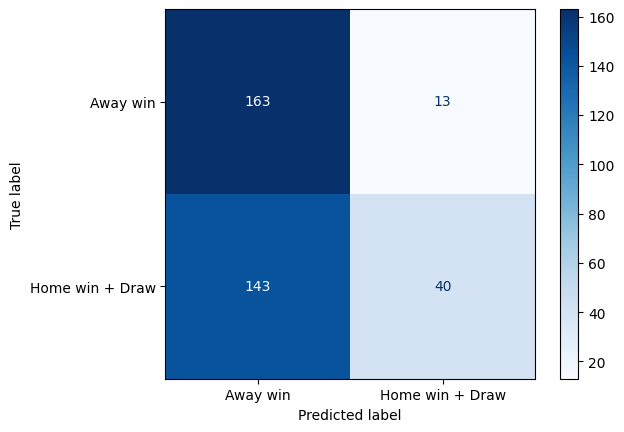

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)  # Add max_depth for regularization
clf.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()




To avoid confusing the model about numeric values associated with categorical features like home_team, away_team, and country, we apply one-hot encoding. This process transforms each category into a binary vector, ensuring that the model does not incorrectly assume a numeric hierarchy or ordering among categories (e.g., treating one country as "greater" than another).

Additionally, we exclude certain columns, such as outcome, home_score, away_score, winning_team, and losing_team, from the training data because they can reveal or directly correlate with the target variable (Binary_outcome). Including these columns would lead to data leakage, where the model makes perfect but trivial predictions, thus failing to generalize to new data. This ensures that the model learns to predict the target based on more generalizable features.

In this 2x2 confusion matrix, we have the following values:

    True Positives (TP): 40 - Correctly predicted 'Home win + Draw'.
    True Negatives (TN): 163 - Correctly predicted 'Away win'.
    False Positives (FP): 13 - Incorrectly predicted 'Away win' when it was 'Home win + Draw'.
    False Negatives (FN): 143 - Incorrectly predicted 'Home win + Draw' when it was 'Away win'.

### Decision Tree:

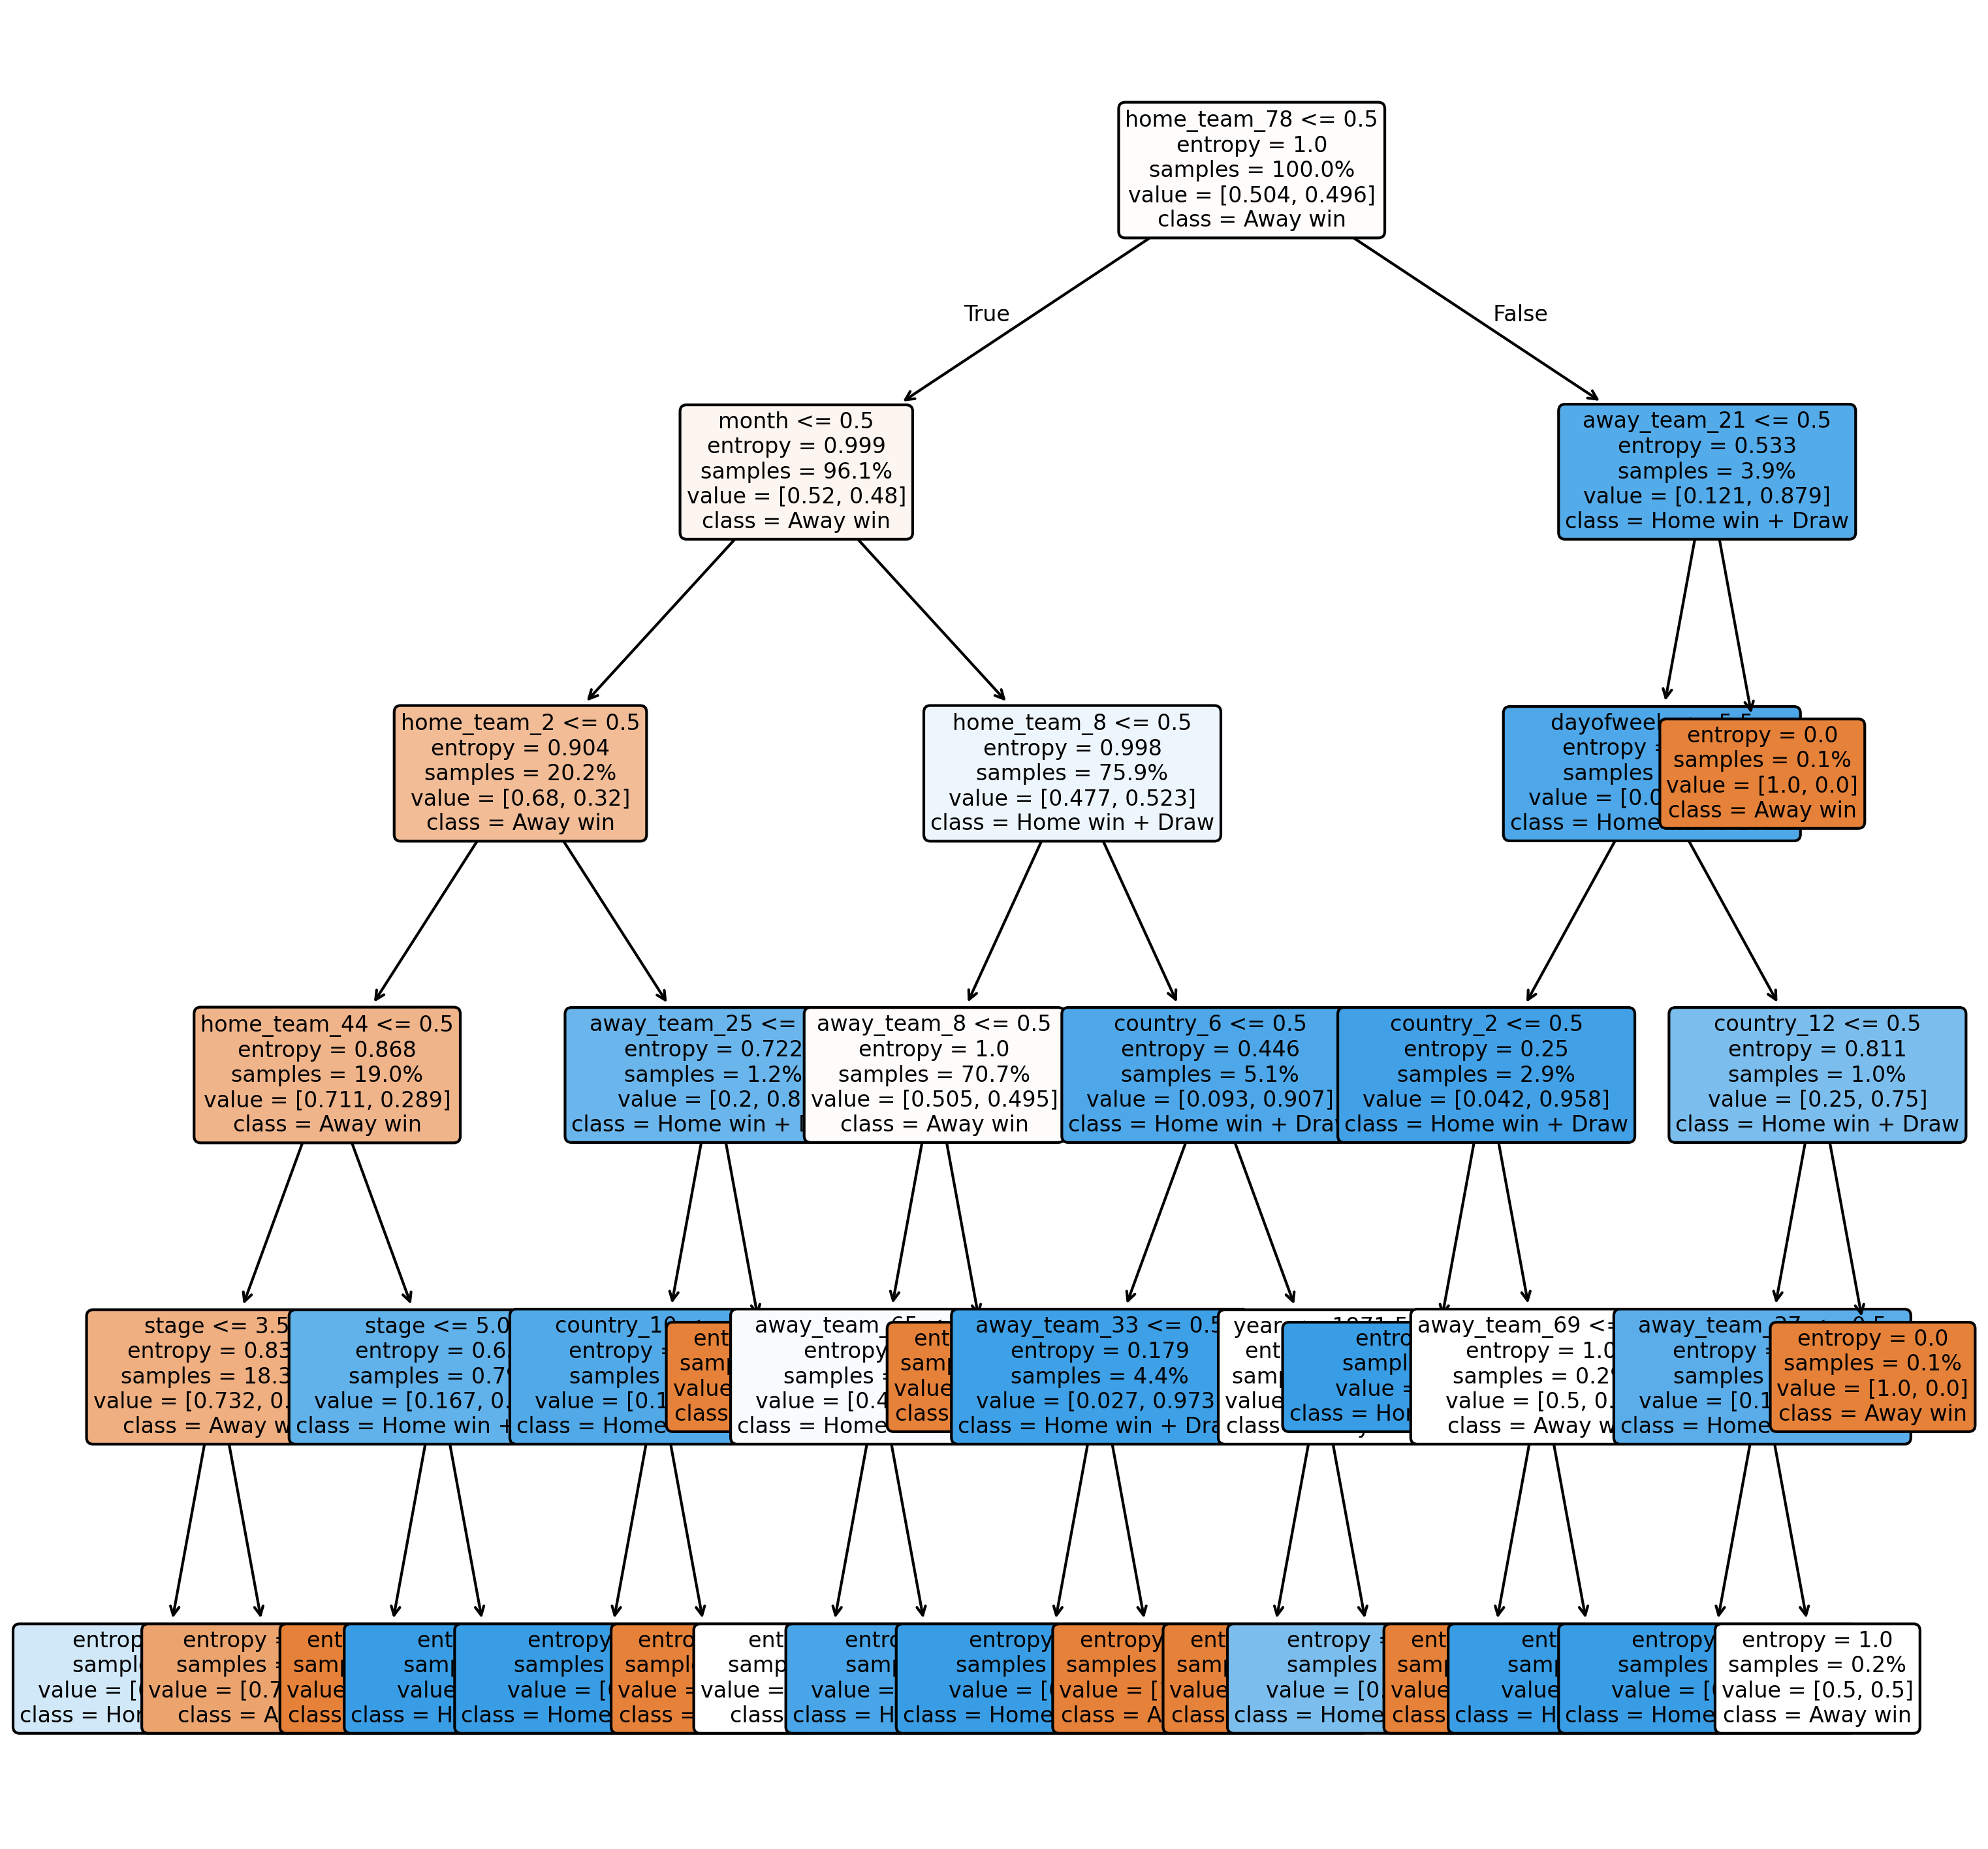

In [21]:

import matplotlib.pyplot as plt
from sklearn import tree




fn = X_train.columns.tolist()  # Get feature names from the processed training data
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
tree.plot_tree(clf,
               feature_names=fn,
               class_names=['Away win', 'Home win + Draw'],
               filled=True,
               rounded=True,
               proportion=True,
               fontsize=8)
plt.show()


In this decision tree for football match predictions, the splitting process starts by evaluating the most influential features, such as home team characteristics or specific match conditions, as determined by their information gain or entropy values. The model systematically divides the data at each node based on feature thresholds, segregating matches based on their corresponding values. 

Following the initial split, additional features like away team, month, or country are considered, further dividing the samples into more specific subsets. This process continues through successive levels, evaluating attributes like match day, stage, or other relevant features, and refining the data into smaller groups.

At each stage, the tree aims to maximize the separation between 'Away win' and 'Home win + Draw' classes by selecting features that best reduce uncertainty (entropy) or maximize information gain. The terminal nodes of the tree, known as leaf nodes, represent the final prediction outcomes, classifying matches based on the accumulated path of decisions. This structure helps in predicting the match outcome by accounting for historical patterns and match-specific conditions.

### Completing in model evaluation and selection:

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Proper feature exclusion
columns_to_exclude = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team', 'outcome']
X = df.drop(columns=columns_to_exclude, axis=1)
y = df['Binary_outcome']

# Apply one-hot encoding to categorical features
categorical_columns = ['home_team', 'away_team', 'country']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train the model with regularization
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)


# حساب مصفوفة الارتباك (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# حساب الدقة (Accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ (Error Rate)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (Sensitivity/Recall) والخصوصية (Specificity)
TP = cm[1, 1]  # عدد الصحيحين من الفئة الإيجابية (True Positives)
TN = cm[0, 0]  # عدد الصحيحين من الفئة السلبية (True Negatives)
FP = cm[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية (False Positives)
FN = cm[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية (False Negatives)

# الحساسية (Sensitivity/Recall)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity (Recall):", sensitivity)

# الخصوصية (Specificity)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

# الدقة (Precision)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)


Confusion Matrix: 
 [[163  13]
 [143  40]]
Accuracy: 0.5654596100278552
Error Rate: 0.43454038997214484
Sensitivity (Recall): 0.2185792349726776
Specificity: 0.9261363636363636
Precision: 0.7547169811320755


Explanation:

    Accuracy: The model's accuracy is moderate, correctly predicting around 56.5% of the match outcomes.
    Error Rate: The error rate of approximately 43.45% indicates the proportion of predictions that were incorrect.
    Sensitivity (Recall): With a sensitivity of around 21.86%, the model has limited effectiveness in correctly identifying 'Home win + Draw' outcomes, indicating potential room for improvement in capturing true positive instances.
    Specificity: The model's specificity is relatively high at 92.61%, reflecting strong performance in correctly predicting 'Away win' outcomes.
    Precision: The precision rate of 75.47% indicates that a substantial portion of predicted 'Home win + Draw' outcomes were correct.

Outcomes:

    The model demonstrates a moderate level of predictive accuracy overall but shows high proficiency in correctly predicting 'Away win' outcomes.
    The lower sensitivity suggests that it struggles to identify 'Home win + Draw' cases, indicating a potential need for fine-tuning or additional features to better capture positive outcomes.
    The high specificity indicates that the model is effective in distinguishing and correctly classifying negative instances ('Away win').

### Splitting Data into: 60% Training and 40% Test:

### Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, random_state=1)

clf3 = clf3.fit (X_train, y_train)

y_pred = clf3.predict (X_test)



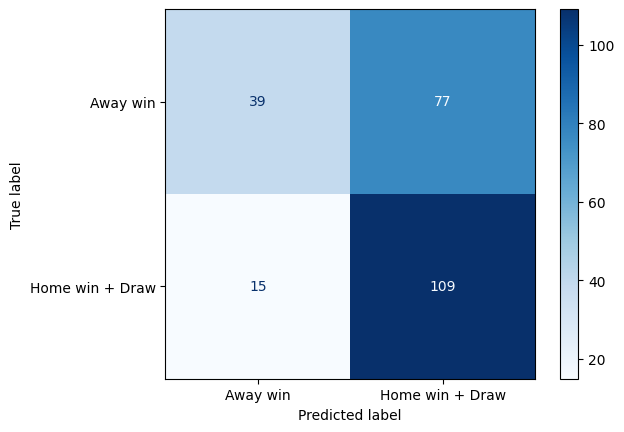

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

# Load the balanced dataset
df = pd.read_csv('Dataset/Balanced_dataset.csv')

# Define features and target
columns_to_exclude_during_training = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team']
X = df.drop(columns=columns_to_exclude_during_training, axis=1)  # Exclude these columns
y = df['Binary_outcome']  # Target variable

# Apply one-hot encoding for categorical features (including 'home_team' and 'away_team')
categorical_columns = ['home_team', 'away_team', 'country']  # Specify all relevant categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # One-hot encoding

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check if 'outcome' needs to be dropped (if present) - adjust as per your data
if 'outcome' in X_train.columns:
    X_train = X_train.drop(columns=['outcome'])
    X_test = X_test.drop(columns=['outcome'])

# Initialize and train the Decision Tree classifier
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)  # Add max_depth for regularization
clf3.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred = clf3.predict(X_test)

# Compute and display the confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Away win', 'Home win + Draw'])
disp.plot(cmap=plt.cm.Blues)
plt.show()




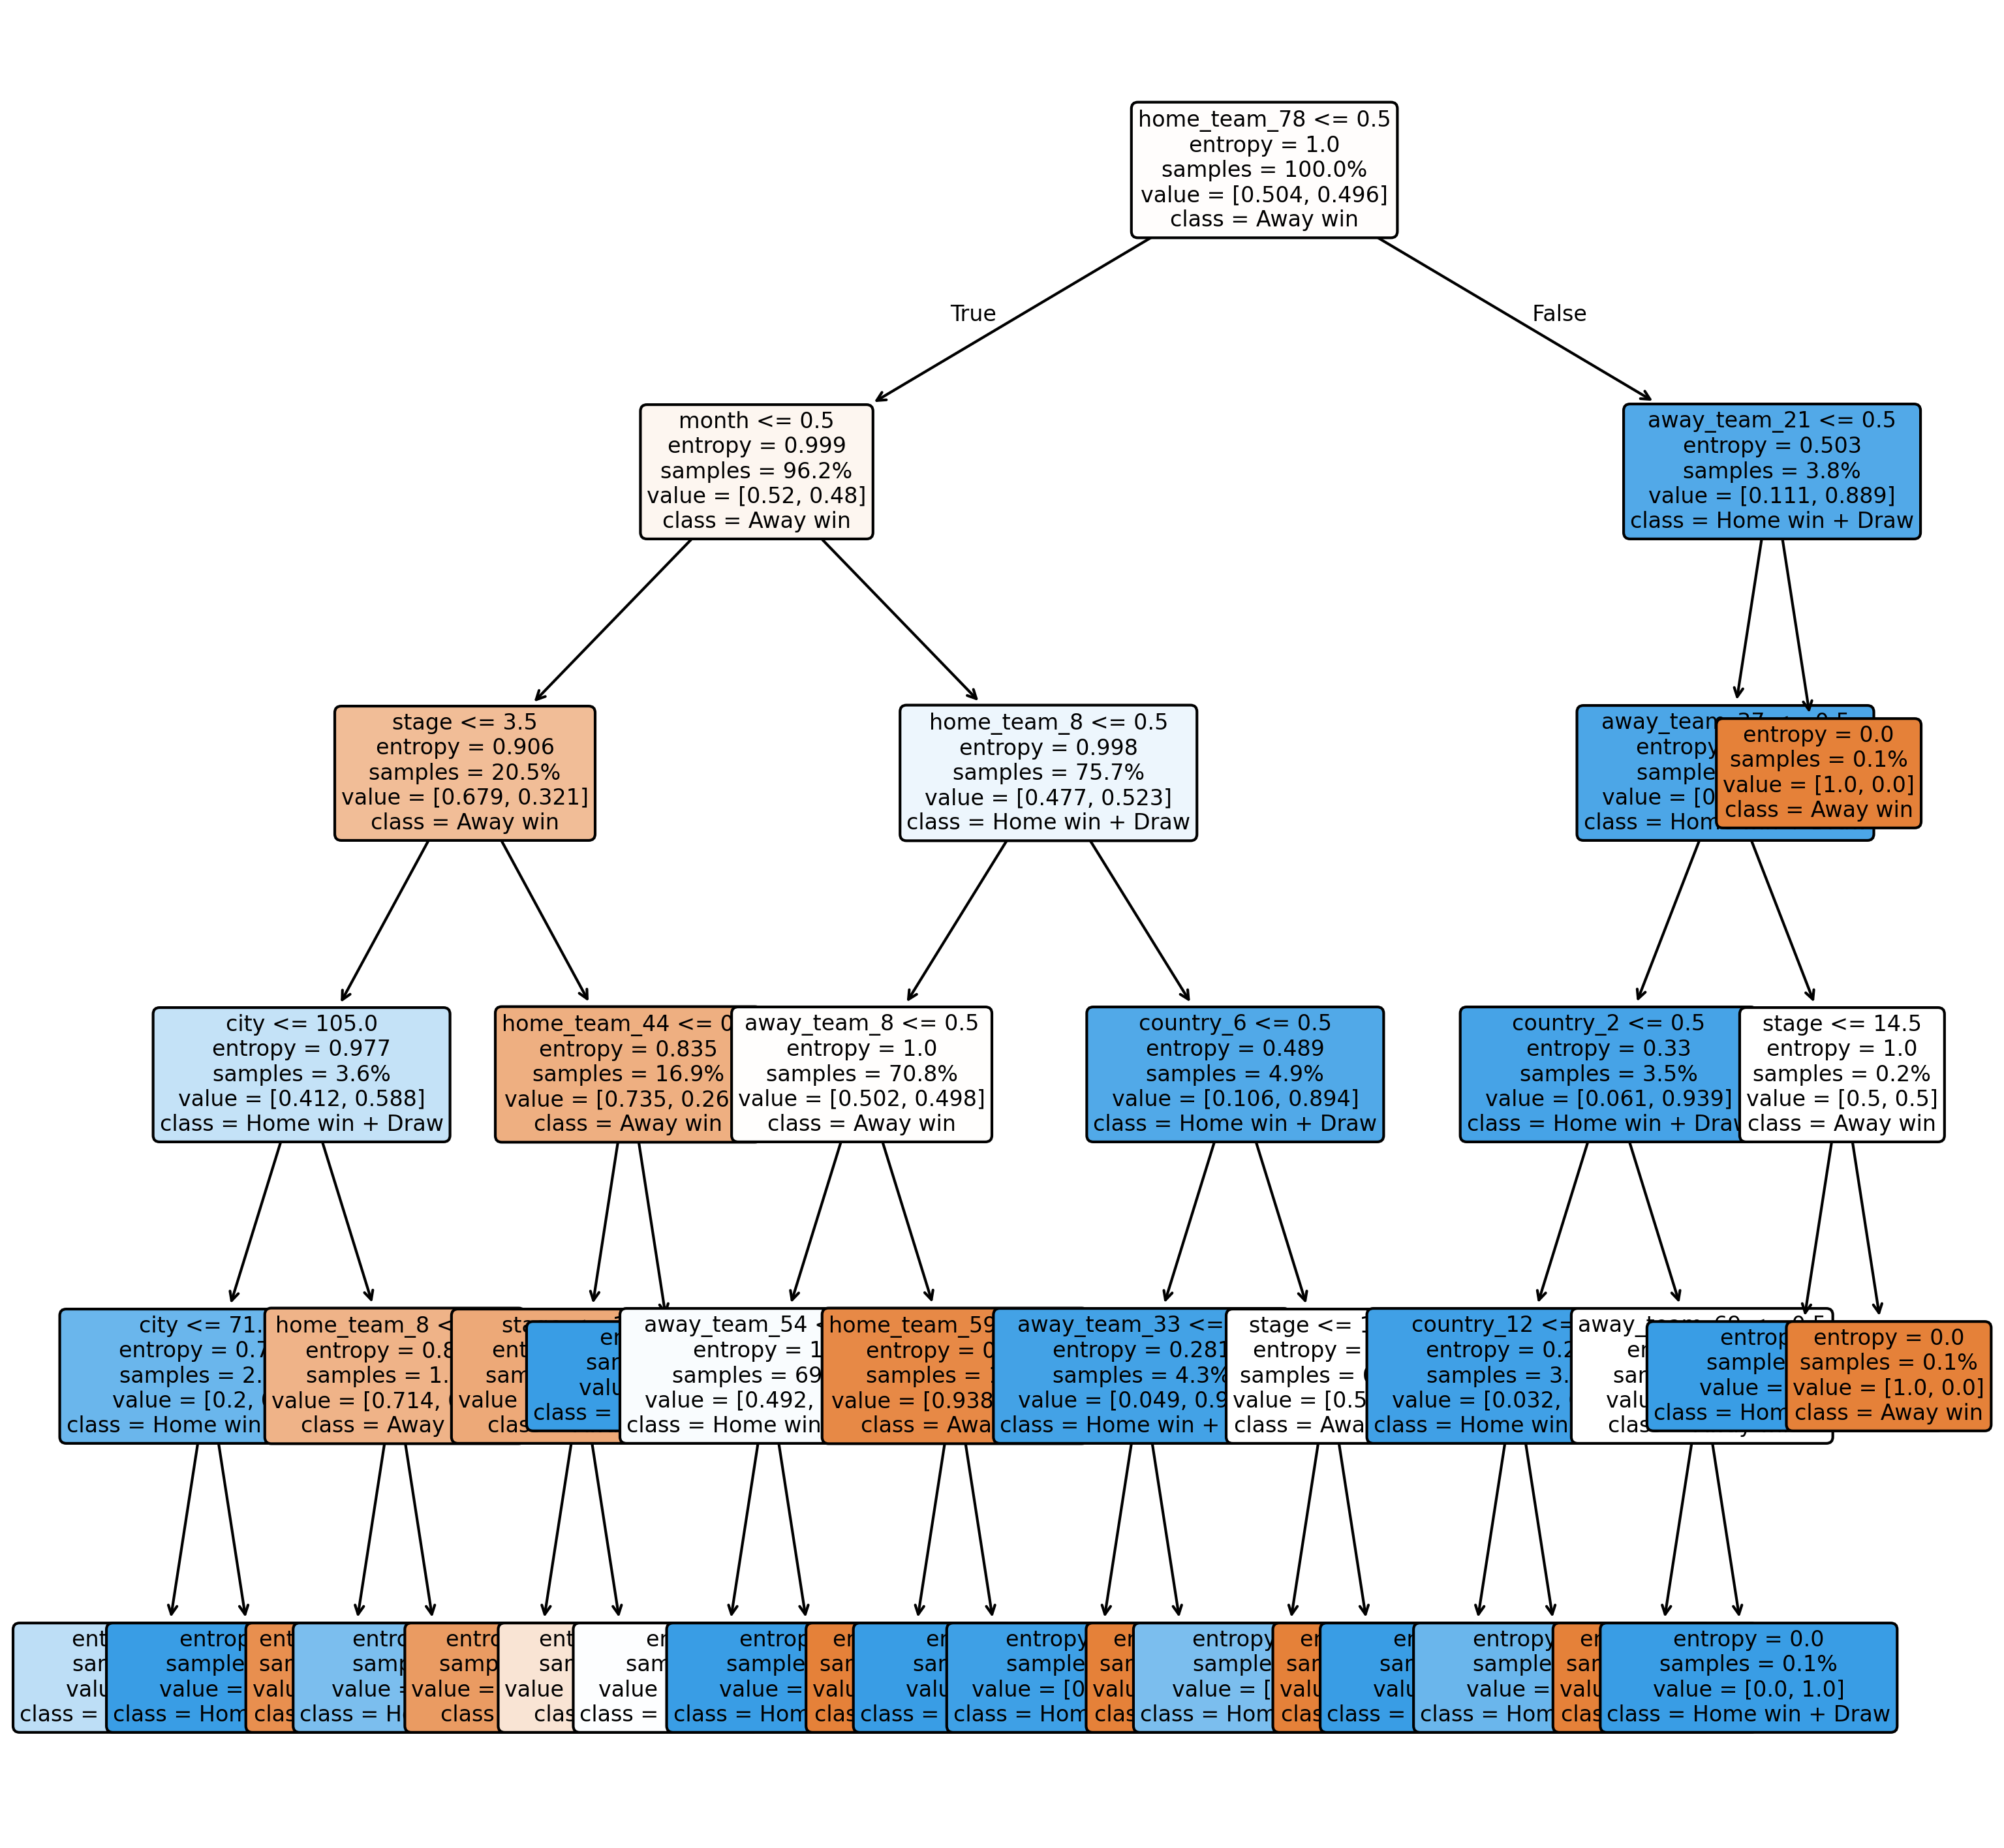

In [27]:

import matplotlib.pyplot as plt
from sklearn import tree




fn = X_train.columns.tolist()  # Get feature names from the processed training data
fig, ax = plt.subplots(figsize=(12, 12), dpi=300)
tree.plot_tree(clf3,
               feature_names=fn,
               class_names=['Away win', 'Home win + Draw'],
               filled=True,
               rounded=True,
               proportion=True,
               fontsize=8)
plt.show()


In [30]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Proper feature exclusion
columns_to_exclude = ['Binary_outcome', 'home_score', 'away_score', 'win_conditions', 'winning_team', 'losing_team', 'outcome']
X = df.drop(columns=columns_to_exclude, axis=1)
y = df['Binary_outcome']

# Apply one-hot encoding to categorical features
categorical_columns = ['home_team', 'away_team', 'country']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Split the dataset correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the model with regularization
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf3.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf3.predict(X_test)


# حساب مصفوفة الارتباك (Confusion Matrix)
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm3)

# حساب الدقة (Accuracy)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# حساب معدل الخطأ (Error Rate)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# حساب الحساسية (Sensitivity/Recall) والخصوصية (Specificity)
TP = cm3[1, 1]  # عدد الصحيحين من الفئة الإيجابية (True Positives)
TN = cm3[0, 0]  # عدد الصحيحين من الفئة السلبية (True Negatives)
FP = cm3[0, 1]  # عدد الحالات السلبية التي تم تصنيفها كإيجابية (False Positives)
FN = cm3[1, 0]  # عدد الحالات الإيجابية التي تم تصنيفها كسلبية (False Negatives)

# الحساسية (Sensitivity/Recall)
sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
print("Sensitivity (Recall):", sensitivity)

# الخصوصية (Specificity)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
print("Specificity:", specificity)

# الدقة (Precision)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
print("Precision:", precision)



Confusion Matrix: 
 [[ 39  77]
 [ 15 109]]
Accuracy: 0.6166666666666667
Error Rate: 0.3833333333333333
Sensitivity (Recall): 0.8790322580645161
Specificity: 0.33620689655172414
Precision: 0.5860215053763441
